# Figure 5abc. Disease heritability analyses of variant-level functional annotations derived from ColocBoost. 

We generated 5 MaxVCP variant-level functional annotation scores by performing xQTL-only ColocBoost (Results) and performed S-LDSC heritability analysis of the resulting annotations. 

**a.** Heritability enrichment conditional on 97 baseline-LD v2.2 annotations. 

**b.** Standardized effect sizes of the 5 MaxVCP scores, each conditional on 97 baseline-LD v2.2 annotations (marginal $τ^*$). 

**c.** Standardized effect sizes, jointly analyzing 97 baseline-LD v2.2 annotations and all 5 MaxVCP scores (joint $τ^*$). 

All results are meta-analyzed across 57 complex traits as well as subsets of 18 brain-related and 22 blood-related traits following from S-LDSC recommendations. The asterisks indicate statistical significance (Bonferroni adjusted p-value<0.05). Error bars indicate 95% confidence intervals.

In [1]:
library(ggplot2)
library(ggforce)
library(ggsci)
data <- readRDS("data/Figure_5abc_5MaxVCP.rds")
sd <- 1.96
# color <- c(pal_npg()(10), pal_d3()(10))
color <- c("#BDBDBD", "#969696", "#fc8d62", "#8da0cb", "#66c2a5")
ylim_values <- list(
  "marginal tau*" = c(-0.2, 1.1),
  "Enrichment" = c(-1, 25),
  "joint tau*" = c(-0.6, 1.2)
)

create_plot <- function(context){
  if (context == "marginal tau*") {
    y.show <- expression(paste("Marginal ", tau, "*"))
  } else if (context == "joint tau*") {
    y.show <- expression(paste("Joint ", tau, "*"))
  } else {
    y.show = context
  }
  if (context == "marginal tau*" | context == "Enrichment") {
    p <- ggplot(data[data$Context == context, ], aes(x = Annotation, y = Value, fill = Annotation)) +
      geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
      geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
      facet_wrap(~ Disease) +
      scale_fill_manual(values = c("MaxVCP-GTEx (0.12%)" = color[1], 
                                   "MaxVCP-bulkROSMAP (0.08%)" = color[2], 
                                   "MaxVCP-pseudobulk (0.04%)" = color[3], 
                                   "MaxVCP-eQTL (0.11%)" = color[4], 
                                   "MaxVCP-xQTL (0.14%)" = color[5])) +
      theme_minimal(base_size = 15) +
      labs(
        title = "",
        x = "",
        y = y.show,
        fill = "Annotation"
      ) +
      ylim(ylim_values[[context]])
  } else {
    test_data <- subset(data, Context == context)
    # pos <- which( test_data$P <= 0.05/5 &  test_data$Value > 0)
    # pos_no <- setdiff(1:nrow(test_data), pos)
    # test_data$Value[pos_no] <- test_data$Error[pos_no] <- 0
    p <- ggplot(test_data, aes(x = Annotation, y = Value, fill = Annotation)) +
      geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
      geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
      facet_wrap(~ Disease) +
      scale_fill_manual(values = c("MaxVCP-GTEx (0.12%)" = color[1], 
                                   "MaxVCP-bulkROSMAP (0.08%)" = color[2], 
                                   "MaxVCP-pseudobulk (0.04%)" = color[3], 
                                   "MaxVCP-eQTL (0.11%)" = color[4], 
                                   "MaxVCP-xQTL (0.14%)" = color[5])) +
      theme_minimal(base_size = 15) +
      labs(
        title = "",
        x = "",
        y = y.show,
        fill = "Annotation"
      ) +
      ylim(ylim_values[[context]])
  }
  if (context == "marginal tau*") {
    p <- p + geom_text(data = subset(data, Context == "marginal tau*" & P <= 0.05/6), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else if (context == "joint tau*") {
    p <- p + geom_text(data = subset(data, Context == "joint tau*" & P <= 0.05/6 & Value>0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else {
    p <- p + geom_hline(yintercept = 1, linetype = "dashed", color = "grey20", linewidth = 0.7)  + 
      geom_text(data = subset(data, Context == "Enrichment" & P <= 0.05/6), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  }
  if (context == "joint tau*"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      # axis.text.x = element_text(angle = 45, hjust = 1),
      axis.title.y = element_text(margin = margin(r = -4)),
      legend.position = "inside",
      legend.justification = c(0, 1.1),
      legend.title = element_text(size = 0),
      legend.text = element_text(size = 10),
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else if (context == "Enrichment"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_text(size = 15),
      axis.text.x = element_blank(),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else {
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      axis.title.y = element_text(margin = margin(r = -2)),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  }
  return(p)
}

plot_single_tau <- create_plot("marginal tau*")
plot_enrichment <- create_plot("Enrichment")
plot_joint_tau <- create_plot("joint tau*")

library(ggpubr)
pp = ggarrange(plot_enrichment, plot_single_tau, plot_joint_tau,
               ncol = 1, nrow = 3,
               heights = c(0.34, 0.33, 0.33))

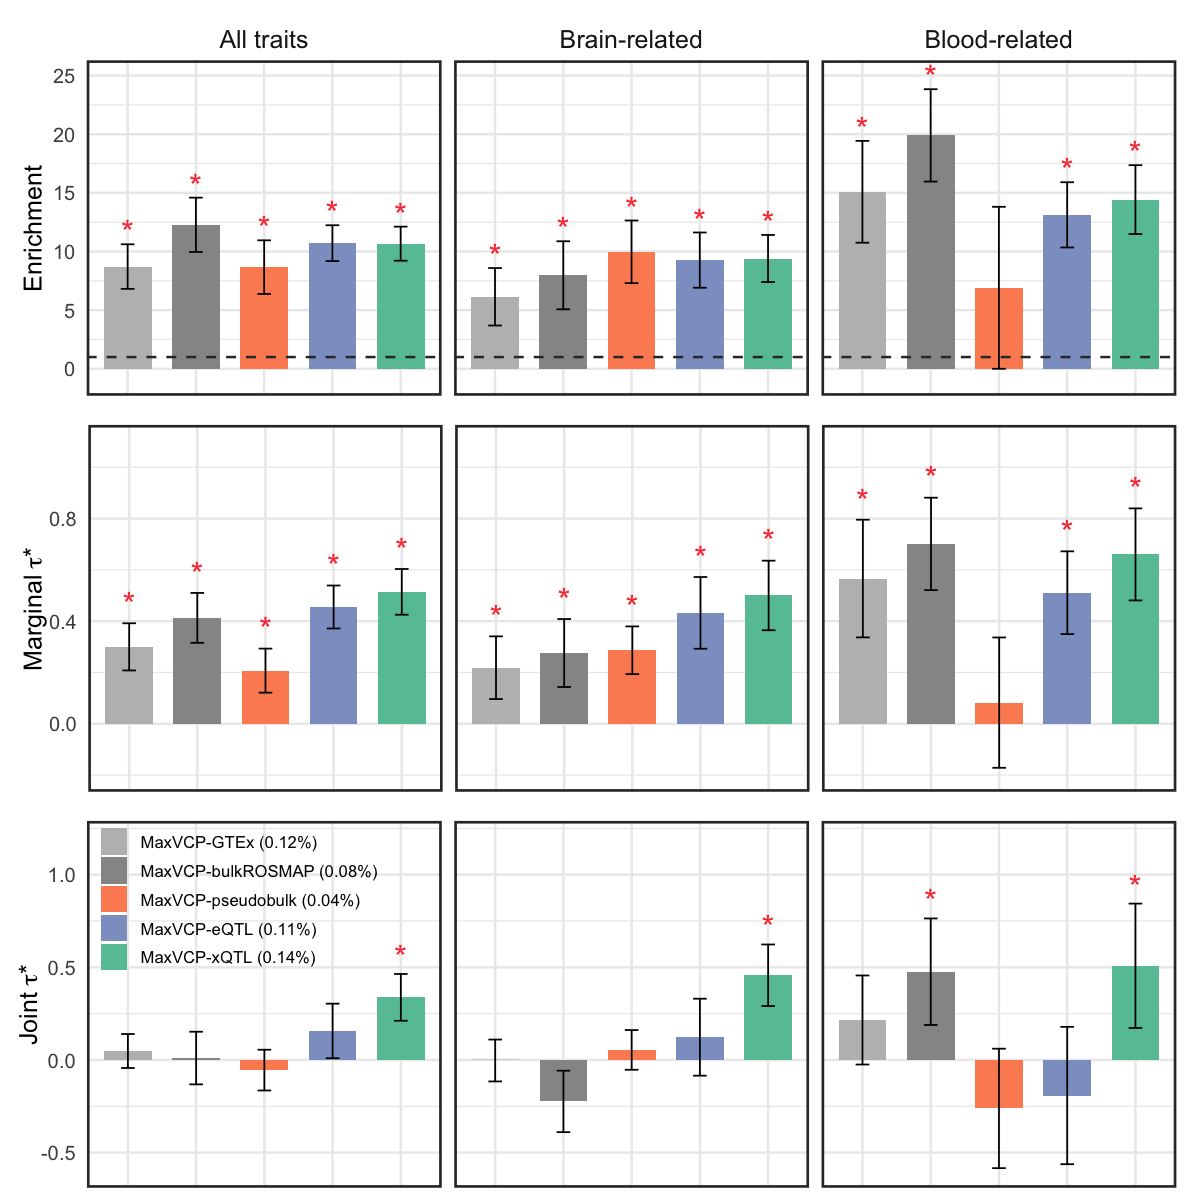

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)
pp